<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter8/Mock3/mock_test_3_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## (1) 데이터를 탐색하고 탐색 결과를 제시하시오.

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/refs/heads/main/data/hotel_bookings.csv")
df

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


먼저 데이터의 자료형과 대략적인 통계치들을 살펴보자

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [3]:
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
mean,0.12000,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.00000,629.000000,13.000000,30.000000,1.000000,26.000000,66.000000,17.000000,379.000000,451.500000


`deposit_type`을 제외하고 모두 수치형 데이터이며, 대부분의 변수들의 최소값, 1분위수 2분위수 3분위수 값이 0임을 확인 할 수 있다.  
`deposit_type`은 명목척도이므로 추후에 레이블 인코딩을 통해 변환이 필요해 보인다.

### 데이터 분포와 상관관계 확인

산점도 행렬과 상관관계 행렬을 그려보자.

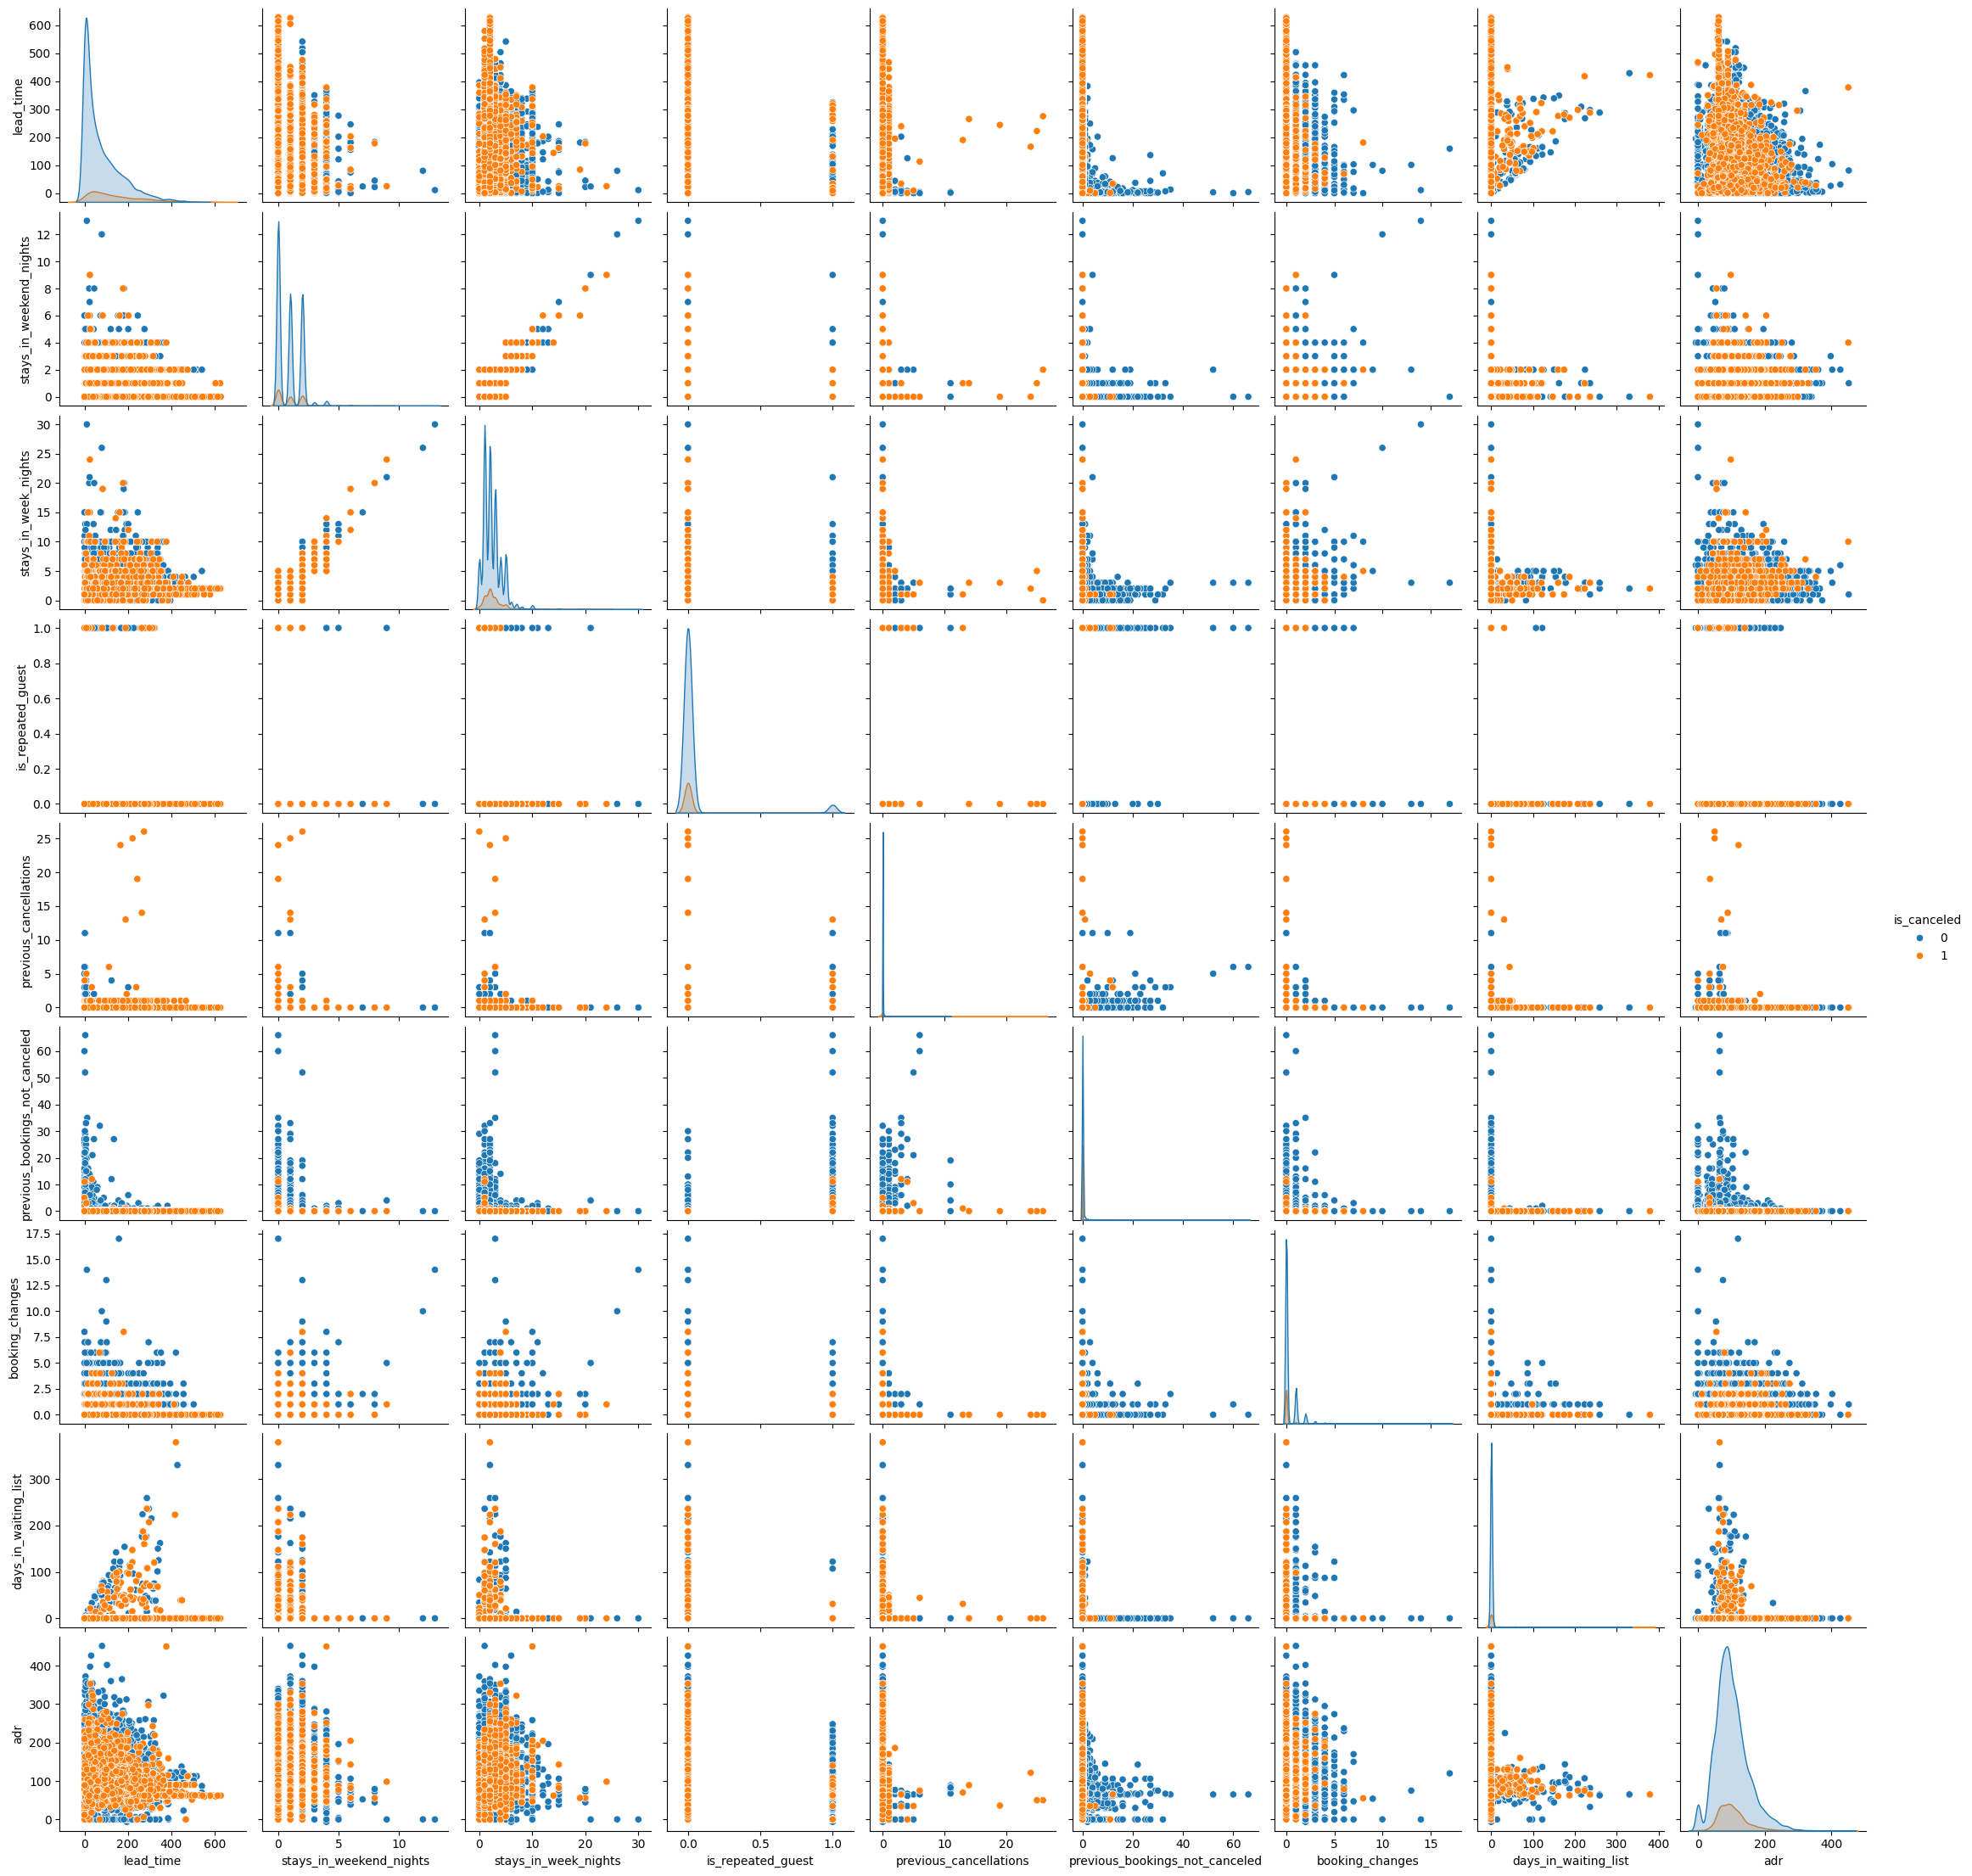

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, diag_kind = 'auto', hue = 'is_canceled')
plt.show()

<Axes: >

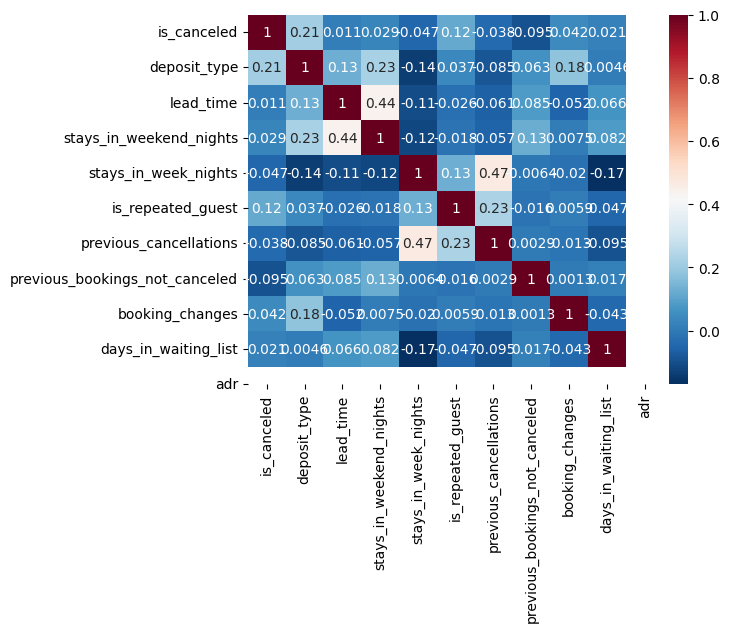

In [5]:
df_corr = df.drop(columns = 'deposit_type').corr(method = 'pearson')

sns.heatmap(df_corr, xticklabels = df.columns, yticklabels = df.columns, cmap = 'RdBu_r', annot = True)

변수들 사이에서 강한 상관관계를 가지는 변수쌍은 없어보이므로, 모든 변수들을 모델링에 고려해도 좋을 것 같다.  
또한 산점도 행렬에서 `is_canceled`의 분포에 불균형이 보인다.


### 이상치 탐색


먼저 대략적으로 box plot을 통해 이상치를 식별해보자

In [6]:
X = df.drop(columns = ['deposit_type', 'is_canceled'])
df_v1 = pd.melt(X, var_name = 'col', value_name = 'value')
df_v1

,col,value
0,lead_time,105.0
1,lead_time,303.0
2,lead_time,33.0
3,lead_time,48.0
4,lead_time,216.0
...,...,...
179995,adr,62.0
179996,adr,130.0
179997,adr,100.0
179998,adr,209.0


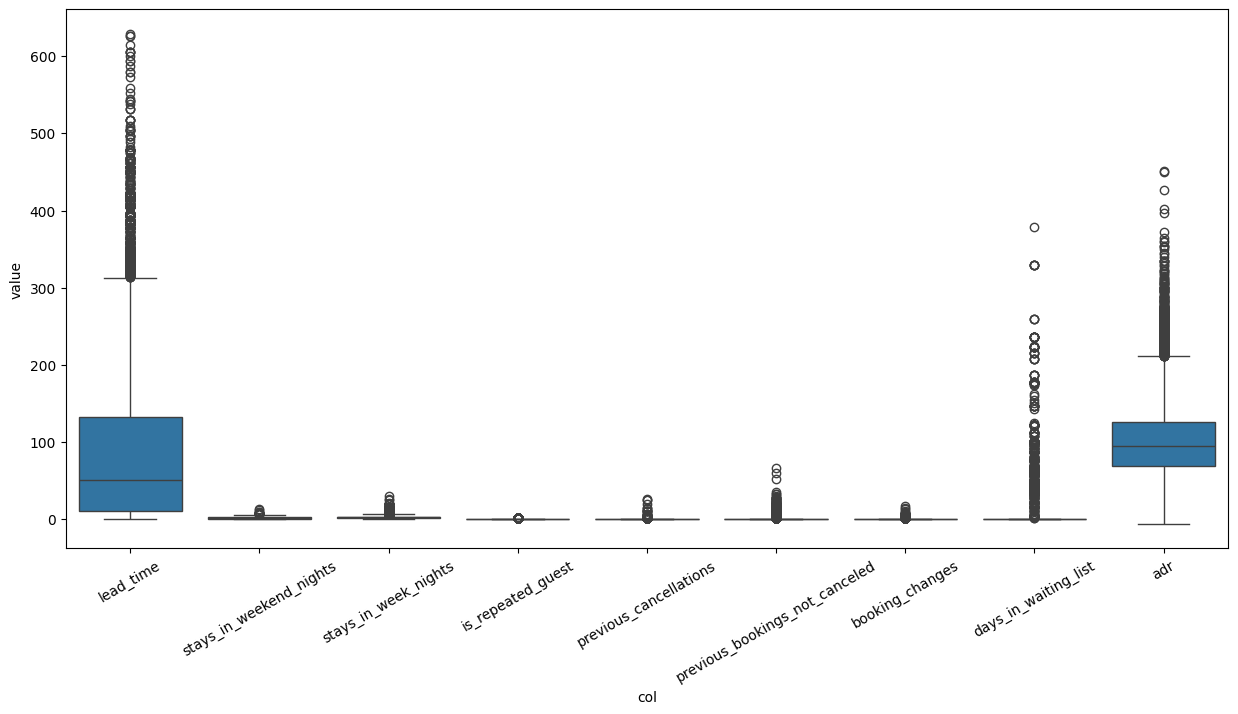

In [7]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'col', y = 'value', data = df_v1)
plt.xticks(range(len(X.columns)), X.columns)
plt.xticks(rotation = 30)
plt.show()

변수들이 스케일링이 되지 않아 정확한 식별이 어렵다.
각 변수들의 이상치를 iqr방식으로 식별하여 따로따로 그려보자

In [8]:
def outliers_iqr(dt, col):
	q1, q3 = np.percentile(dt[col], [25,75])
	iqr = q3 - q1
	lw = q1 - (iqr * 1.5)
	uw = q3 + (iqr * 1.5)
	outliers = dt[(dt[col] > uw) | (dt[col] < lw)]
	normals = dt[(dt[col] >= uw) & (dt[col] <= lw)]
	return outliers[[col]], normals[[col]]

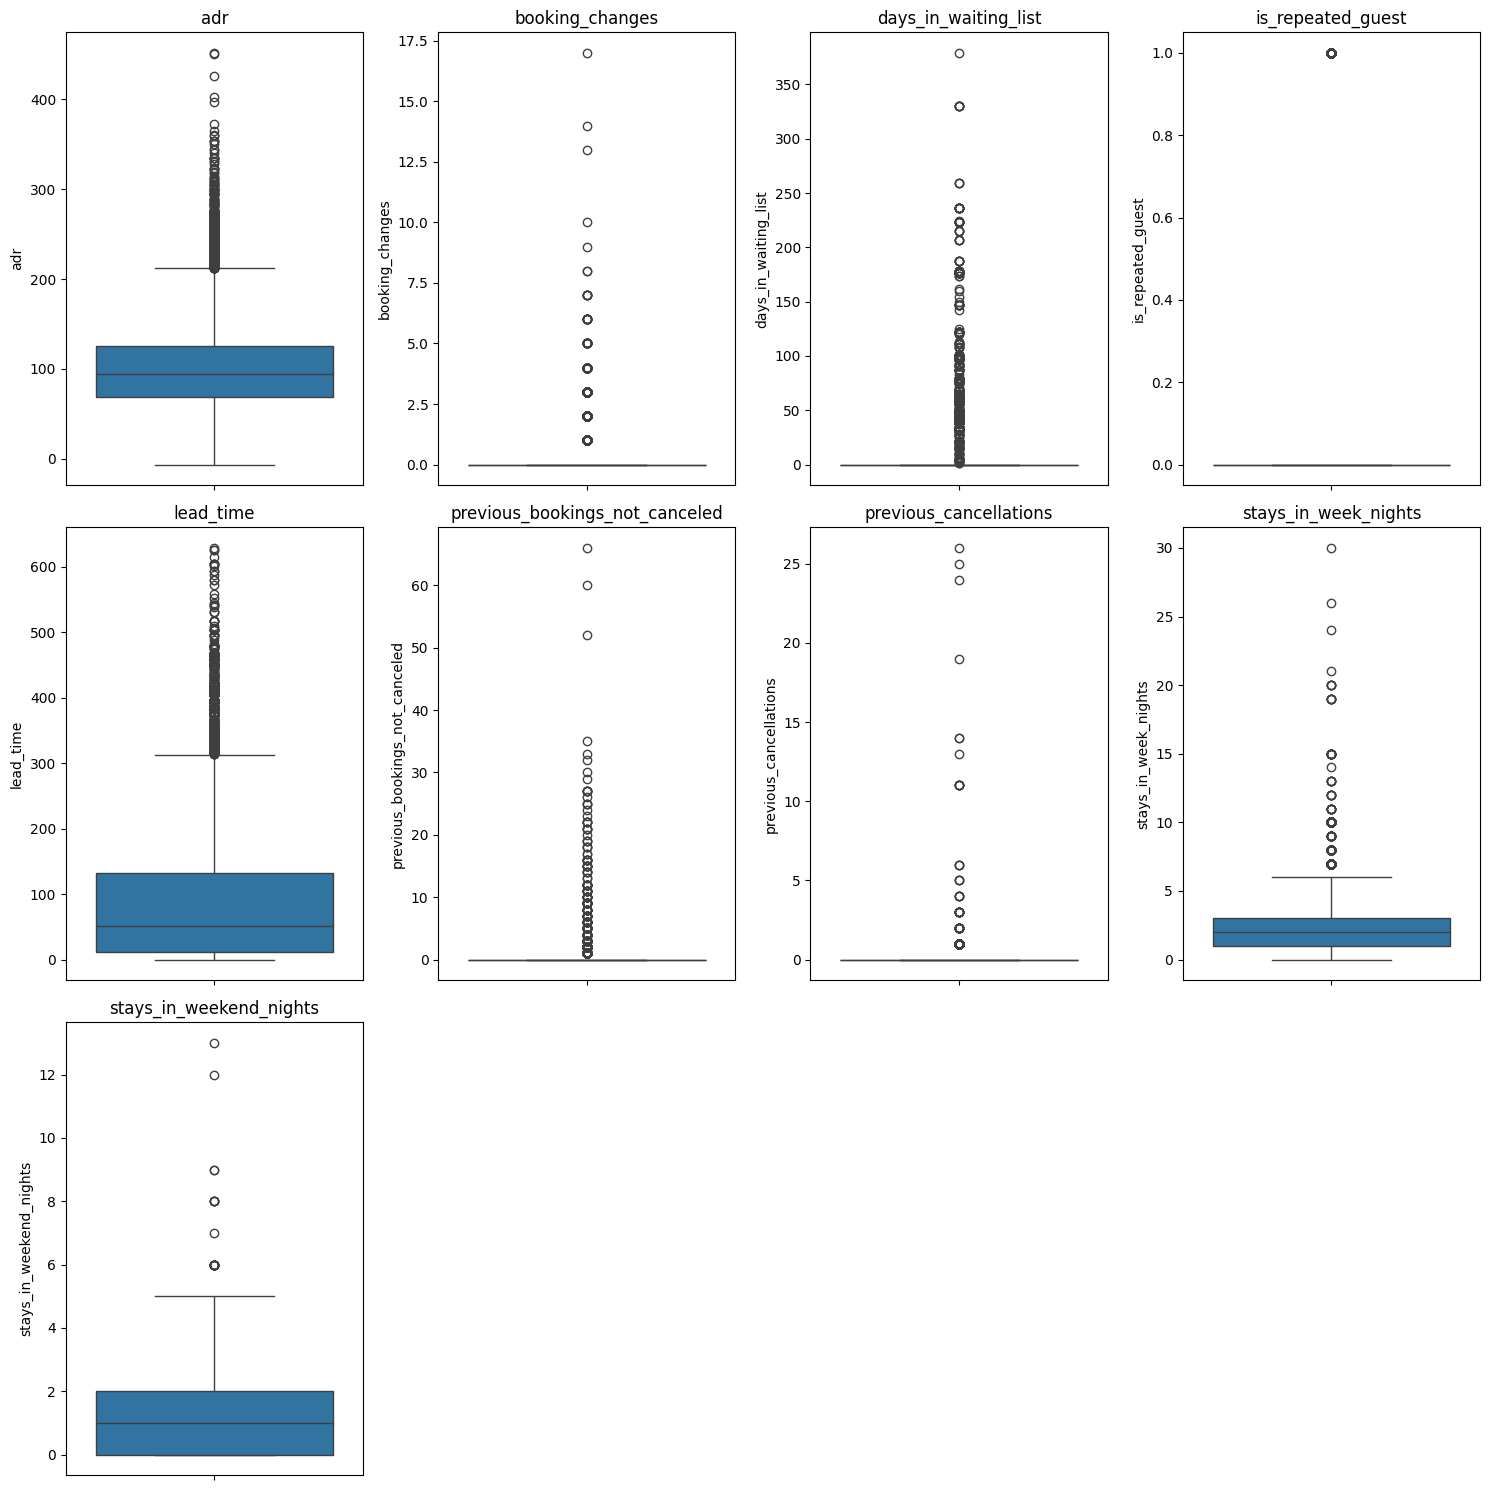

In [11]:
import numpy as np

columns_to_draw = df.columns.difference(['is_canceled', 'deposit_type'])

ncols = 4
nrows = np.ceil(len(columns_to_draw) / ncols).astype("int64")
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15, 5 * nrows))

axes = axes.flatten()

for i, column in enumerate(columns_to_draw):
  sns.boxplot(y = df[column], ax = axes[i])
  axes[i].set_title(f'{column}')

for j in range(len(columns_to_draw), len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

먼저 결측치를 탐색해보겠다.

In [12]:
# 결측치 탐색
df.isna().sum()

,0
is_canceled,0
deposit_type,0
lead_time,5
stays_in_weekend_nights,0
stays_in_week_nights,0
is_repeated_guest,358
previous_cancellations,0
previous_bookings_not_canceled,0
booking_changes,0
days_in_waiting_list,0


lead_time, is_repeated_guest, 그리고 adr변수에서 결측치가 존재함을 확인할 수 있다.

In [13]:
df[df.isna().any(axis=1)]

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
7,0,No Deposit,219.0,1,2,NaN,0,0,0,0,76.67
11,0,No Deposit,77.0,2,2,0.0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19923,1,Non Refund,545.0,0,2,NaN,0,0,0,0,62.00
19942,1,Non Refund,336.0,0,2,0.0,1,0,0,0,NaN
19947,1,Non Refund,177.0,2,0,NaN,1,0,0,0,121.00
19953,1,No Deposit,292.0,0,3,0.0,0,0,0,0,NaN


식별된 결측치를 대체하는 방법에는 단순대치법과 KNN을 이용한 방법이 있다.  

단순대치법은 수치형 변수라면 각 컬럼의 평균이나 중앙값을 사용하여 대치하고, 명목형, 범주형 변수라면 최빈값을 사용하여 대치할 수 있다.

KNN을 이용한 대체는 결측치가 없는 컬럼들의 최근접 이웃 알고리즘을 통해 결측치를 대체하는 방법이며, 거리 계산이 가능한 수치형 변수만 사용 가능하다.  

is_repeated_guest는 수치형 변수이지만 실질적으로는 명목형 변수이므로, 최빈값을 사용하여 단순대치하고 나머지 변수들은 KNN을 사용하여 대치해보겠다.



In [14]:
# 결측치가 포함된 열을 식별한다
missing_column = df.isna().sum(axis = 0) != 0
missing_column

,0
is_canceled,False
deposit_type,False
lead_time,True
stays_in_weekend_nights,False
stays_in_week_nights,False
is_repeated_guest,True
previous_cancellations,False
previous_bookings_not_canceled,False
booking_changes,False
days_in_waiting_list,False


In [15]:
missing_column = missing_column.index[missing_column.values == [True]]
missing_column

Index(['lead_time', 'is_repeated_guest', 'adr'], dtype='object')

In [16]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

df_filled = imputer.fit_transform(df[missing_column.drop('is_repeated_guest')])
df_filled = pd.DataFrame(df_filled)
df_filled.columns = missing_column.drop('is_repeated_guest')
df_filled

,lead_time,adr
0,105.0,131.500
1,303.0,73.950
2,33.0,111.242
3,48.0,80.300
4,216.0,60.900
...,...,...
19995,89.0,62.000
19996,101.0,130.000
19997,277.0,100.000
19998,0.0,209.000


`is_repeated_guest` 열은 최빈값으로 채운다

In [17]:
df_filled['is_repeated_guest'] = df['is_repeated_guest']
df_filled['is_repeated_guest'].fillna(df['is_repeated_guest'].mode().values[0], inplace = True)

<ipython-input-17-f12c85f69e4e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['is_repeated_guest'].fillna(df['is_repeated_guest'].mode().values[0], inplace = True)


In [18]:
df_filled.isna().sum()

,0
lead_time,0
adr,0
is_repeated_guest,0


In [19]:
df[missing_column] = df_filled
df.isna().sum()

,0
is_canceled,0
deposit_type,0
lead_time,0
stays_in_weekend_nights,0
stays_in_week_nights,0
is_repeated_guest,0
previous_cancellations,0
previous_bookings_not_canceled,0
booking_changes,0
days_in_waiting_list,0


이로써 df데이터프레임에 결측치는 더이상 존재하지 않는다.

## (3) 데이터의 질을 향상시킬 수 있는 방법을 제안하시오.

상술했듯이 두가지 문제점이 있다.
1. 종속변수의 분포의 심각한 불균형
이는 언더 혹은 오버 샘플링을 통해 해결할 수 있다.
2. 이상치
lead_time 변수의 이상치를 보정해주어 극단적인 값을 제거함으로써 모델에 특정 값이 영향을 주는 경우를 방지할 수 있다.

## (4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

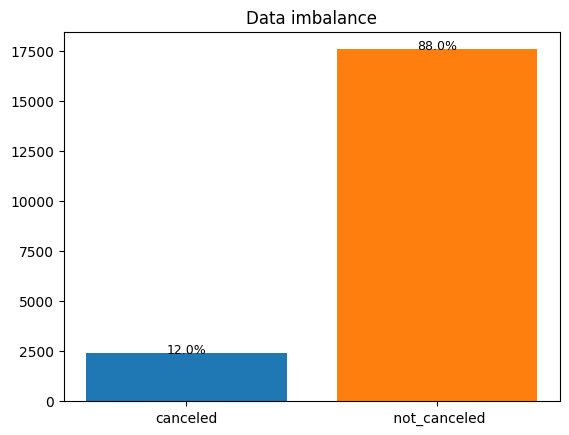

In [20]:
canceled = df[(df['is_canceled'] == 1)]
not_canceled = df[(df['is_canceled'] == 0)]

index = ['canceled' ,' not_canceled']
length = [len(canceled), len(not_canceled)]
plt.bar( index[0], height = len(canceled))
plt.bar( index[1], height = len(not_canceled))
plt.title("Data imbalance")

for i in range(2):
  plt.text(index[i], length[i] + 1,f"{round(( length[i] / len(df)) * 100, 2)}%",
           ha='center', fontsize=9, color='black')
plt.show()

`is_canceled`값이 0인 데이터가 1인 데이터보다 약 7배 많은 것을 볼 수 있다.  
이를 해결하기 위해 차후에 언더 혹은 오버 샘플링을 실행해야 함을 알 수 있다.

# (5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을  선정하고 근거를 제시하시오

오버 샘플링 기법은 비중이 데이터를 추가로 생성해 수를 늘려 데이터 불균형을 극복하는 방식이다. 소수 레이블을 가진 데이터세트를 다수 레이블을 가진 데이터세트의 수만큼 증식시켜 학습에 충분한 데이터를 확보하는 기법이다. 언더 샘플링은 데이터 손실의 문제로 인해 예측성능이 저하되는 단점이 있으므로, 일반적으로는 불균형한 데이터를 처리하는 방식으로 오버 샘플링을 사용한다.
1. Random Oversampling
    1. 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식한다.
    2. 데이터를 단순 복사하는 방식이므로 기존의 데이터와 동일한 복제 데이터를 생성한다.
    3. Random Oversampling은 소수 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만, 사용방법이 간단하다는 장점이 있다.
2. SMOTE
    1. SMOTE는 적은 데이터세트에 있는 개별 데이터들의 K-최근접 이웃을 찾아, 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다.
    2. SMOTE는 Resampling 방식보다 처리 속도가 느리다는 단점이 있지만, 데이터를 단순히 동일하게 증식시키는 방식이 아니기 때문에, 과적합 문제를 예방할 수 있다는 장점이 있다.

# (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

Random Oversampling과 SMOTE를 선택하였다.  
선택한 이유는 Random Oversampling은 소수의 데이터세트를 랜덤으로 복사하는 간단한 방법으로 데이터 불균형 문제를 해결할 수 있고,  
SMOTE 기법은 데이터를 생성할 때, 소수의 데이터 분포를 기반으로 데이터를 생성하여 과적합을 방지할 수 있기 때문이다.

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df.drop(columns = ['is_canceled'])
X['deposit_type'] = le.fit_transform(X['deposit_type'])
X['deposit_type']
y = df['is_canceled']

In [63]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
start = time.time()
oversample = RandomOverSampler(random_state = 42)
x_over, y_over = oversample.fit_resample(X,y)
end = time.time()
print(f"time :  {(end - start):.6f}")
print(Counter(y_over))

time :  0.021144
Counter({0: 17600, 1: 17600})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [64]:
from imblearn.over_sampling import SMOTE
start = time.time()

sm = SMOTE(random_state = 42)
X_sm, y_sm = sm.fit_resample(X,y)
end = time.time()
print(f"time :  {(end - start):.6f}")
print(Counter(y_sm))

time :  0.054650
Counter({0: 17600, 1: 17600})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


# (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고 그 이유를 설명하시오.

먼저 각각의 기법에 대해 훈련데이터셋과 테스트 데이터셋을 분류하자

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(
    x_over, y_over, test_size=0.3, random_state=42)

X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(
    X_sm, y_sm, test_size=0.3, random_state=42)

## 원데이터 속도 및 정확도 측정

In [90]:
import time
pipe_origin = make_pipeline(RandomForestClassifier())
kfold = StratifiedKFold(n_splits = 5).split(X_train, y_train)
scores_lr = []

start = time.time()
for k , (train, test) in enumerate(kfold):
  pipe_origin.fit(X_train.iloc[train], y_train.iloc[train])
  score = pipe_origin.score(X_train.iloc[test], y_train.iloc[test])
  scores_lr.append(score)
  print(f'폴드 : {k+1:02d},'
        f'클래스 분포 : {np.bincount(y_train.iloc[test])},'
        f'정확도 : {score:.3f}') # Changed 3.f to .3f to specify precision
end = time.time()

mean_lr = np.mean(scores_lr)
std_lr = np.std(scores_lr)
print(f'평균 검증 정확도 : {mean_lr:.3f}')
print(f'검증 정확도 표준편차 : {std_lr:.3f}')


print(f"time :  {(end - start):.6f}")

폴드 : 01,클래스 분포 : [2462  338],정확도 : 0.920
폴드 : 02,클래스 분포 : [2462  338],정확도 : 0.921
폴드 : 03,클래스 분포 : [2462  338],정확도 : 0.921
폴드 : 04,클래스 분포 : [2461  339],정확도 : 0.914
폴드 : 05,클래스 분포 : [2461  339],정확도 : 0.914
평균 검증 정확도 : 0.918
검증 정확도 표준편차 : 0.003
time :  8.350128


테스트 세트에 대해 evaluate 해보자

In [91]:
print("train 정확도 :", pipe_origin.score(X_train, y_train))
pred = pipe_origin.predict(X_test)
print(classification_report(y_test, pred))

train 정확도 : 0.9791428571428571
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5292
           1       0.82      0.43      0.56       708

    accuracy                           0.92      6000
   macro avg       0.88      0.71      0.76      6000
weighted avg       0.92      0.92      0.91      6000



## RandomOverSampling 기법 속도 및 정확도 측정

In [92]:
import time
pipe_random = make_pipeline(RandomForestClassifier())
kfold = StratifiedKFold(n_splits = 5).split(X_over_train, y_over_train)
scores_lr = []

start = time.time()
for k , (train, test) in enumerate(kfold):
  pipe_random.fit(X_over_train.iloc[train], y_over_train.iloc[train])
  score = pipe_random.score(X_over_train.iloc[test], y_over_train.iloc[test])
  scores_lr.append(score)
  print(f'폴드 : {k+1:02d},'
        f'클래스 분포 : {np.bincount(y_over_train.iloc[test])},'
        f'정확도 : {score:.3f}') # Changed 3.f to .3f to specify precision
end = time.time()

mean_lr = np.mean(scores_lr)
std_lr = np.std(scores_lr)
print(f'평균 검증 정확도 : {mean_lr:.3f}')
print(f'검증 정확도 표준편차 : {std_lr:.3f}')


print(f"time :  {(end - start):.6f}")

폴드 : 01,클래스 분포 : [2463 2465],정확도 : 0.950
폴드 : 02,클래스 분포 : [2463 2465],정확도 : 0.953
폴드 : 03,클래스 분포 : [2463 2465],정확도 : 0.951
폴드 : 04,클래스 분포 : [2464 2464],정확도 : 0.958
폴드 : 05,클래스 분포 : [2464 2464],정확도 : 0.954
평균 검증 정확도 : 0.953
검증 정확도 표준편차 : 0.003
time :  12.769500


테스트 세트에 대해 evaluate 해보자

In [93]:
print("train 정확도 :", pipe_random.score(X_over_train, y_over_train))
pred = pipe_random.predict(X_over_test)
print(classification_report(y_over_test, pred))

train 정확도 : 0.9844967532467532
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      5283
           1       0.93      0.99      0.96      5277

    accuracy                           0.95     10560
   macro avg       0.96      0.95      0.95     10560
weighted avg       0.96      0.95      0.95     10560



## SMOTE 기법 속도 및 정확도 측정

In [94]:
import time
pipe_smote = make_pipeline(RandomForestClassifier())
kfold = StratifiedKFold(n_splits = 5).split(X_sm_train, y_sm_train)
scores_lr = []

start = time.time()
for k , (train, test) in enumerate(kfold):
  pipe_smote.fit(X_sm_train.iloc[train], y_sm_train.iloc[train])
  score = pipe_smote.score(X_sm_train.iloc[test], y_sm_train.iloc[test])
  scores_lr.append(score)
  print(f'폴드 : {k+1:02d},'
        f'클래스 분포 : {np.bincount(y_sm_train.iloc[test])},'
        f'정확도 : {score:.3f}') # Changed 3.f to .3f to specify precision
end = time.time()

mean_lr = np.mean(scores_lr)
std_lr = np.std(scores_lr)
print(f'평균 검증 정확도 : {mean_lr:.3f}')
print(f'검증 정확도 표준편차 : {std_lr:.3f}')


print(f"time :  {(end - start):.6f}")

폴드 : 01,클래스 분포 : [2463 2465],정확도 : 0.871
폴드 : 02,클래스 분포 : [2463 2465],정확도 : 0.866
폴드 : 03,클래스 분포 : [2463 2465],정확도 : 0.875
폴드 : 04,클래스 분포 : [2464 2464],정확도 : 0.877
폴드 : 05,클래스 분포 : [2464 2464],정확도 : 0.879
평균 검증 정확도 : 0.874
검증 정확도 표준편차 : 0.004
time :  15.923850


테스트 세트에 대해 evaluate 해보자

In [89]:
print("train 정확도 :", pipe_smote.score(X_sm_train, y_sm_train))
pred = pipe_smote.predict(X_sm_test)
print(classification_report(y_sm_test, pred))

train 정확도 : 0.9724837662337662
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5283
           1       0.87      0.86      0.87      5277

    accuracy                           0.87     10560
   macro avg       0.87      0.87      0.87     10560
weighted avg       0.87      0.87      0.87     10560



해당 데이터세트의 정확도 측면에서나 속도 측면에서 모두 SMOTE보다 Random Oversampling의 성능이 더 우수하다.

# (8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

F1 score는 정밀도와 재현율을 동시에 고려하여 모델의 예측 성능을 종합적으로 평가하는 지표이다.  
원본 데이터와 오버 샘플링 데이터로 랜덤포레스트 분류 예측을 수행했을 때 F1 Score를 비교해보면 오버 샘플링이 분석 정확도에 긍정적인 영향을 주었다는 것을 알 수 있다.  

특히 오버 샘플링은 데이터의 불균형으로 인한 과적합을 방지하고, 예측모델의 일반화를 가능하게 하였다.  

원본 데이터로 예측한 모델의 F1 Score는 Class0은 0.96, Class1은 0.60이였다.  

랜덤 오버 샘플링한 데이터로 예측한 모델의 F1 Score는 Class0은 0.95, Class1은 0.95 이다.  

두 결과를 비교해보면 데이터의 불균형이 있었던 Class1에서 F1 Score가 큰 차이가 나는 것을 알 수 있다.  

이처럼 데이터 불균형 문제를 전처리 과정에서 극복할 수 있다.
즉, 불균형 데이터가 있을 때에는 오버 샘플링을 통해 분류모델의 성능을 향상시킬 수 있다.  
